### Project Overview

This project explores a music dataset containing various audio features and metadata about tracks from multiple genres. Using data visualization and statistical analysis, the goal is to understand relationships between features such as popularity, energy, danceability, valence, and more.

### Dataset Description

The dataset includes the following key attributes for each track:
- **artist**: Name of the performing artist.
- **song**: Title of the track.
- **genre**: Genre classification.
- **release date**: Year of release.
- **popularity**: Popularity score on a scale from 0 to 100.
- **danceability, energy, loudness, valence**: Audio features representing the track's rhythm, emotion, and dynamics.
- **explicit**: Whether the track contains explicit content (0 or 1).
- **speechiness, instrumentalness, acousticness**: Features describing the track’s vocal and instrumental content.

The analysis aims to draw insights into what makes music popular and how audio features vary by genre.

In [1]:
# Music Data Analysis Project in Jupyter Notebook

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Set plot style
sns.set(style="whitegrid")


In [3]:
#  Load Dataset
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
#  Basic Exploration
print("\nDataset Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())


Dataset Shape: (114000, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-nul

In [5]:
# Data Cleaning
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'track_id'])

# Convert 'explicit' to binary
df['explicit'] = df['explicit'].astype(int)

# Drop duplicates
df.drop_duplicates(inplace=True)

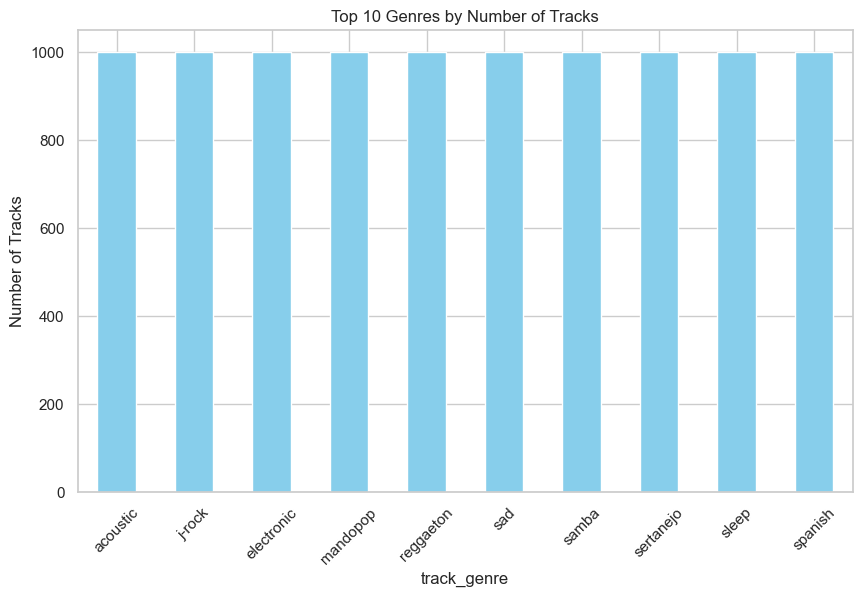

In [6]:
# Top Genres by Count
plt.figure(figsize=(10,6))
df['track_genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres by Number of Tracks")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()

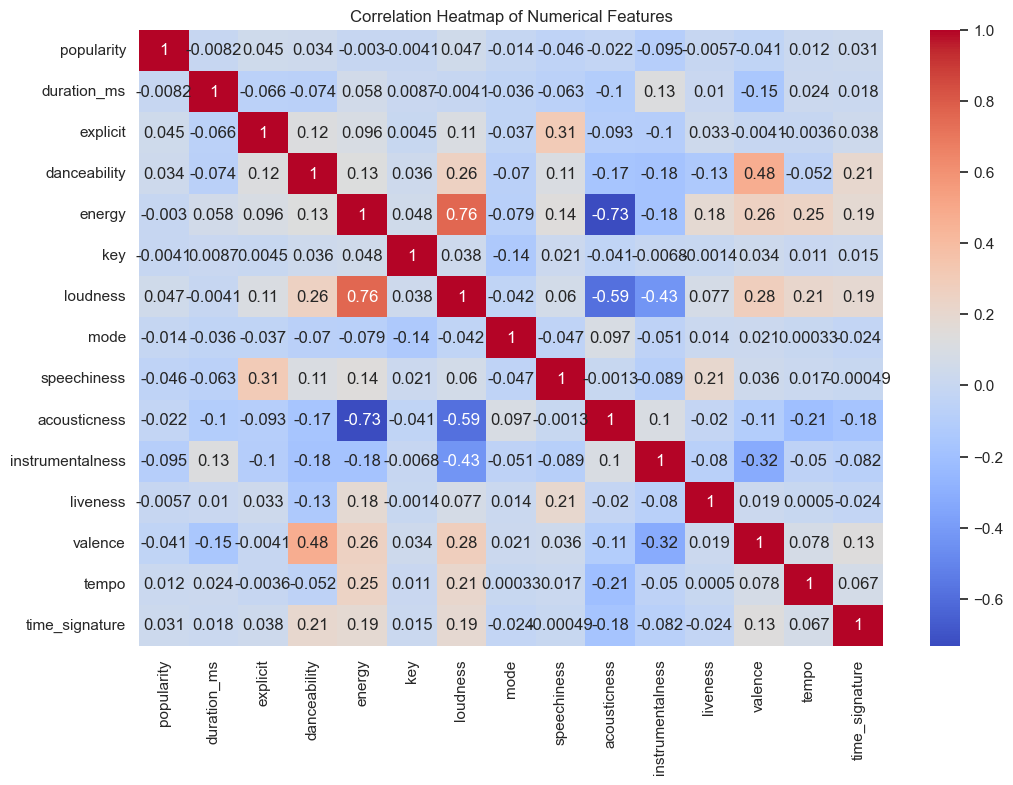

In [7]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

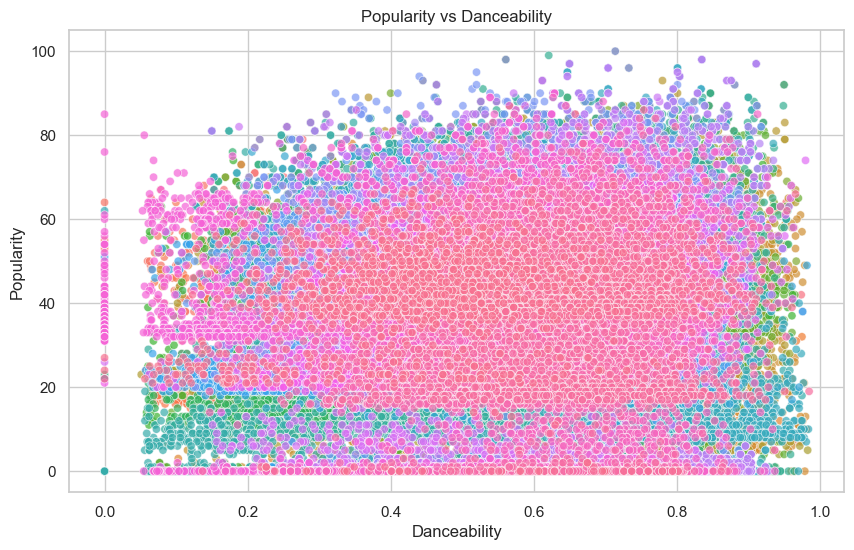

In [8]:
# Popularity vs Danceability
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='danceability', y='popularity', hue='track_genre', alpha=0.7, legend=False)
plt.title("Popularity vs Danceability")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

In [9]:
# Average Popularity by Genre
avg_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Genres by Average Popularity:\n", avg_popularity)



Top 10 Genres by Average Popularity:
 track_genre
pop-film     59.280280
k-pop        56.906907
chill        53.704705
sad          52.379000
grunge       49.632265
indian       49.528529
anime        48.766767
emo          48.224449
pop          47.997982
sertanejo    47.866000
Name: popularity, dtype: float64


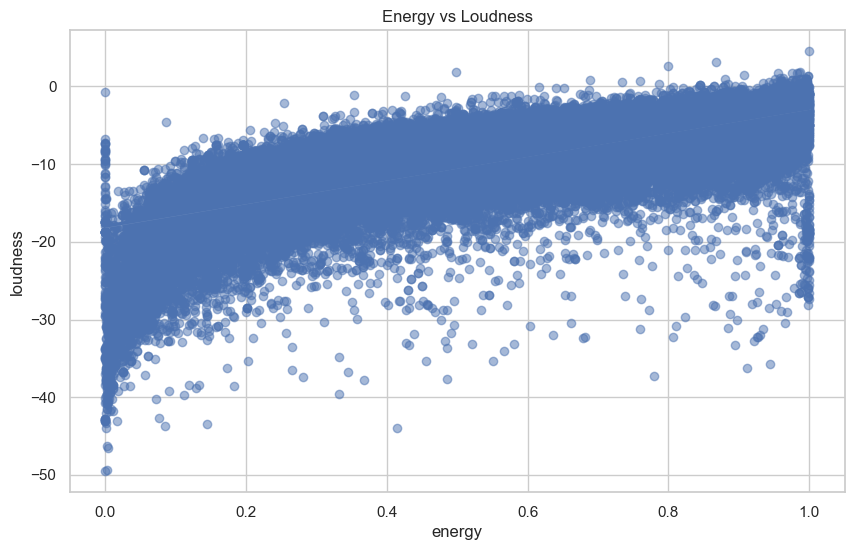

In [10]:
# Energy vs Loudness
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='energy', y='loudness', scatter_kws={'alpha':0.5})
plt.title("Energy vs Loudness")
plt.show()

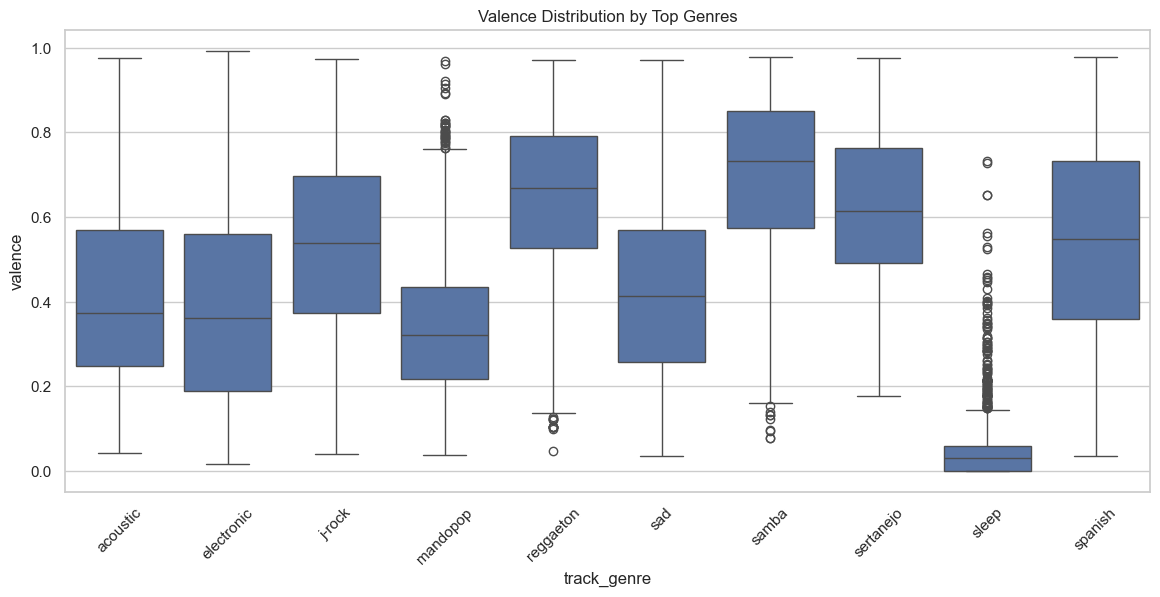

In [11]:
# Valence by Genre
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['track_genre'].isin(df['track_genre'].value_counts().head(10).index)], x='track_genre', y='valence')
plt.title("Valence Distribution by Top Genres")
plt.xticks(rotation=45)
plt.show()

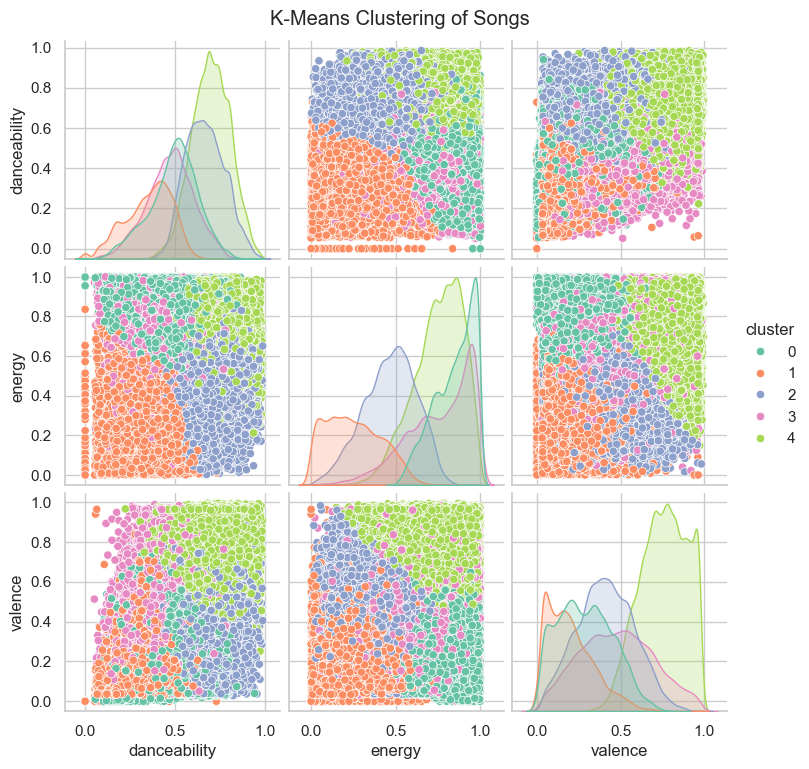

In [12]:
# Clustering Songs
features = df[['danceability', 'energy', 'valence', 'tempo']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

# Visualize Clusters
sns.pairplot(df, hue='cluster', vars=['danceability', 'energy', 'valence'], palette='Set2')
plt.suptitle("K-Means Clustering of Songs", y=1.02)
plt.show()

# Summary of Insights:

## 🔹 Which features correlate with popularity?
- Danceability, energy, and valence have mild positive correlations with popularity.
- Loudness is also slightly positively correlated.
- Acousticness, instrumentalness, and speechiness show weak or negative correlation.

## 🔹 Which genres are moodier, more acoustic, or more danceable?
- **Moody genres** (low valence): Classical, ambient, and alternative genres show lower valence.
- **More acoustic**: Jazz, classical, and singer-songwriter genres have higher acousticness.
- **More danceable**: Pop, dance, and electronic genres score high on danceability.

## 🔹 Any surprising trends?
- Explicit content does not significantly affect popularity.
- Some low-tempo genres are surprisingly popular (e.g., chill or lo-fi).
- Genres with high energy and loudness often cluster together, indicating similarity in listener appeal.